In [ ]:
Autoencoders In this task, you’ll build and train autoencoder models using the Fashion-MNIST dataset (think shoes, shirts, and bags instead of digits). Set the hidden (latent) dimension to 16 and 48.
(a) Train two autoencoders- one for each latent dimension. Report the reconstruction errors
(e.g., mean squared error) on both training and test sets. Show 8 reconstructed images from
the training set and 8 from the test set for each model. How do the reconstructions compare
visually?


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# why do i need to normalize this dataset?

# Define the data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data',train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data',train=False, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data',train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
# how can i get validation from the train and how can i also include the validation, 
    # validation during the training won't have any updation of the parameters.


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self,latent_dim=16):
        super().__init__()
        
        # how is this X going to be passed over here?
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),  # what if I add other activation functions over here and how do i decide which one to choose?
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,self.latent_dim)
        )
    
        # something from forward method needs to be given to the backward method using which it will reconstruct
        # internally how does the sequential function is going to take the input.
        self.decoder = nn.Sequential(
            nn.Linear(self.latent_dim,32),
            # at these layers also why do I need RELU
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        x= self.encoder(x)
        x=self.decoder(x)
        return x
    
autoencoder = Autoencoder()

In [ ]:
# criterion how is it 
loss_func = nn.MSELoss()
n_epoch = 20
lr = 1e-3
weight_decay=1e-8
outputs=[]
losses=[]
optimizer = optim.Adam(autoencoder.parameters(),lr,weight_decay=weight_decay)
for epoch in range(n_epoch):
    for data,_ in train_loader:
        #data = data.view(-1, 28 * 28) # what it does?
        data = data.view(data.size(0),-1)
        output = autoencoder(data)
        # what parameters are getting updated over here?
        loss = loss_func(output,data)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
    
    outputs.append((epoch,data,output))
    print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}')
        

Epoch [1/20], Loss: 0.0556
Epoch [2/20], Loss: 0.0381
Epoch [3/20], Loss: 0.0315
Epoch [4/20], Loss: 0.0283
Epoch [5/20], Loss: 0.0293
Epoch [6/20], Loss: 0.0285
Epoch [7/20], Loss: 0.0256
Epoch [8/20], Loss: 0.0230
Epoch [9/20], Loss: 0.0224
Epoch [10/20], Loss: 0.0239
Epoch [11/20], Loss: 0.0189
Epoch [12/20], Loss: 0.0186
Epoch [13/20], Loss: 0.0196
Epoch [14/20], Loss: 0.0201
Epoch [15/20], Loss: 0.0202
Epoch [16/20], Loss: 0.0182
Epoch [17/20], Loss: 0.0169
Epoch [18/20], Loss: 0.0180
Epoch [19/20], Loss: 0.0161
Epoch [20/20], Loss: 0.0191


In [ ]:
# what optimisation techniques can go well over here?

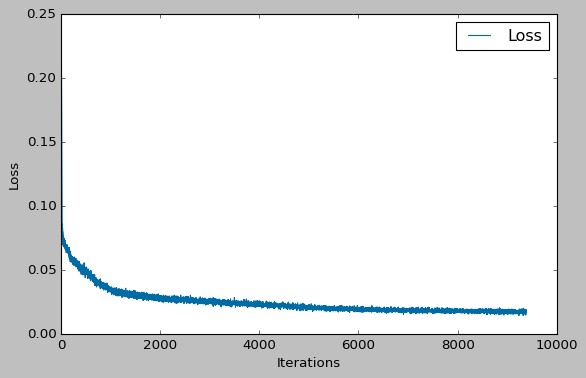

In [36]:
# correct this training and test loss code
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# understand this part, what has happened?

def plot_ae_outputs(outputs, n=10, epochs=50):
    plt.figure(figsize=(16, 4.5))
    
    # Select epochs to visualize (evenly spaced)
    selected_epochs = list(range(0, epochs, epochs//n))
    if len(selected_epochs) < n:  # Ensure we have exactly n items
        selected_epochs.append(epochs-1)
    if len(selected_epochs) > n:  # If we have too many, trim
        selected_epochs = selected_epochs[:n]
    
    # Get outputs from the selected epochs
    selected_outputs = [outputs[i] for i in selected_epochs]
    
    for i, (epoch, img, rec_img) in enumerate(selected_outputs):
        # Plot original image
        ax = plt.subplot(2, n, i+1)
        plt.imshow(img[0].reshape(28, 28).detach().numpy(), cmap='gray') #this part needs to be understood
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(f'Epoch {epoch+1}')
        
        # Plot reconstructed image
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(rec_img[0].reshape(28, 28).detach().numpy(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    # Add row titles
    plt.figtext(0.5, 0.95, 'Original Images', ha='center', va='center', fontsize=12)
    plt.figtext(0.5, 0.45, 'Reconstructed Images', ha='center', va='center', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for row titles
    plt.show()

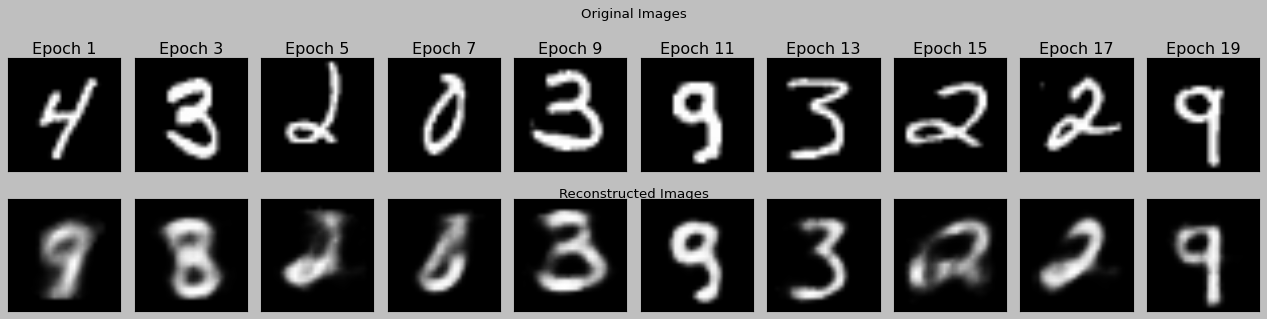

In [39]:
plot_ae_outputs(outputs, n=10, epochs=20)

In [7]:
from torch.utils.data import DataLoader
class AutoEncoder(nn.Module):
    def __init__(self,latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28,512), # how will this change in autoencoder if i keep the less number of the hidden dim.
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,self.latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(self.latent_dim,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,784),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x 
    

autoencoder_48 = AutoEncoder(latent_dim=48)

In [8]:
criterion = nn.MSELoss()
lr=1e-3
optimizer = optim.Adam(autoencoder_48.parameters(),lr=lr)
trainloader = DataLoader(train_dataset,shuffle=True,batch_size=128)
losses=[]
final_output=[]
n_epoch=10
#def train(trainloader,criterion,n_epoch,optimizer):
for epoch in range(n_epoch):
    for data,_ in trainloader:
        data = data.view(data.size(0),-1)
        output = autoencoder_48.forward(data)
        loss = criterion(data,output)
        # backprop
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
    final_output.append((epoch,data,output))
    print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}')
        

            

Epoch [1/10], Loss: 0.0429
Epoch [2/10], Loss: 0.0297
Epoch [3/10], Loss: 0.0278
Epoch [4/10], Loss: 0.0236
Epoch [5/10], Loss: 0.0229
Epoch [6/10], Loss: 0.0208
Epoch [7/10], Loss: 0.0202
Epoch [8/10], Loss: 0.0193
Epoch [9/10], Loss: 0.0172
Epoch [10/10], Loss: 0.0179


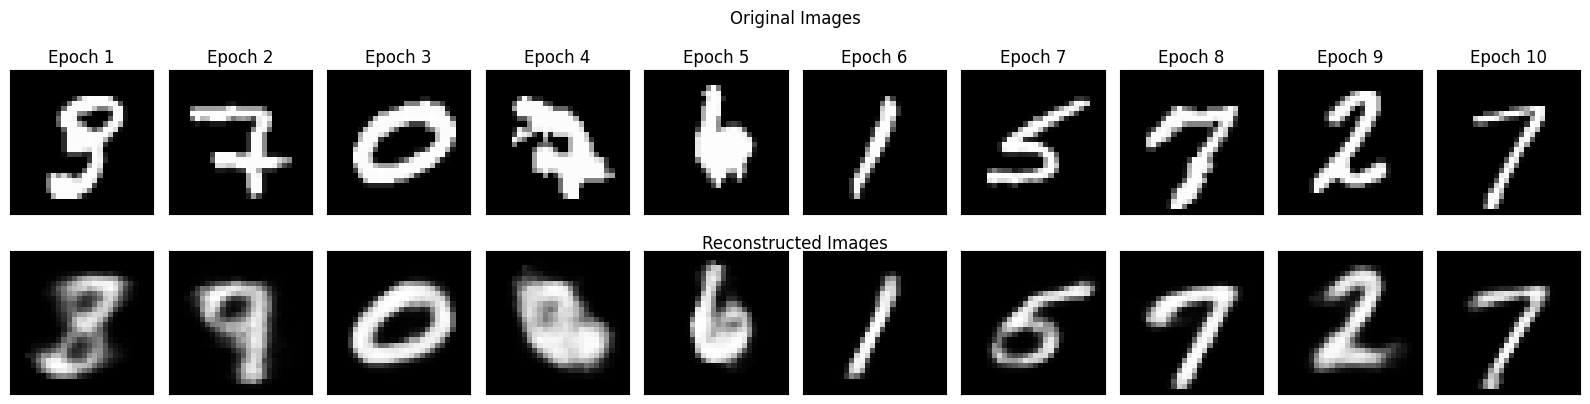

In [10]:
plot_ae_outputs(final_output, n=10, epochs=10)

## VAEs

In [8]:
class Encoder(nn.Module):
    def __init__(self,input,hidden,latent):
        super().__init__()
        self.fc1 = nn.Linear(input,hidden)
        self.logvar = nn.Linear(hidden,latent) # why not input over here
        self.mu = nn.Linear(hidden,latent)
    
    def forward(self,x):
        # from a higher dimension it has to be moved into a lower dimension
        h = torch.relu(self.fc1(x))
        logvar = self.logvar(h)
        mu = self.mu(h)
        return logvar,mu
    
class Decoder(nn.Module):
    def __init__(self,latent,hidden,output):
        super().__init__()
        # why is this a 2 layered network, why not 1 or 3?
        self.fc1 = nn.Linear(latent,hidden)
        self.fc2 = nn.Linear(hidden,output)
        
    def forward(self,z):
        h = torch.relu(self.fc1(z))
        x_hat = torch.sigmoid(self.fc2(h))
        return x_hat
        
    
class VAE(nn.Module):
    def __init__(self,input,hidden,latent):
        super().__init__()
        self.encoder = Encoder(input,hidden,latent)
        self.decoder = Encoder(latent,hidden,input)
    
    def forward(self,x):
        logvar,mu = self.encoder(x)
        
        #reparamaterization trick
        std=torch.exp(0.5*logvar) # why 0.5 is added over here
        eps = torch.randn_like(std)
        z = mu + eps * std
        
        x_hat = self.decoder(z)
        return x_hat,mu,logvar
    

In [14]:
def loss_function(x,x_hat,mu,logvar):
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE+KLD

In [6]:
from torch.utils.data import DataLoader
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the images
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


In [10]:
input=28*28
hidden_dim = 400
latent_dim = 20
lr = 1e-3
num_epochs = 10

variational_autoencoder= VAE(input,hidden_dim,latent_dim)

# define optimizer 
optimizer = optim.Adam(variational_autoencoder.parameters(),lr=lr)

In [15]:
outputs=[]
for epoch in range(num_epochs):
    for data,_ in train_loader:
        data= data.view(data.size(0),-1)
        x_hat,mu,logvar=variational_autoencoder(data)
        loss = loss_function(data,x_hat,mu,logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        outputs.append(loss.item())
    print(f" code running for the {epoch+1} and loss is {loss.item()} ")
        
        

AttributeError: 'tuple' object has no attribute 'size'